# Plotting data from the ALENEX 2023 paper as comparison

The data is in `external/alenex_2023.json.zip`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

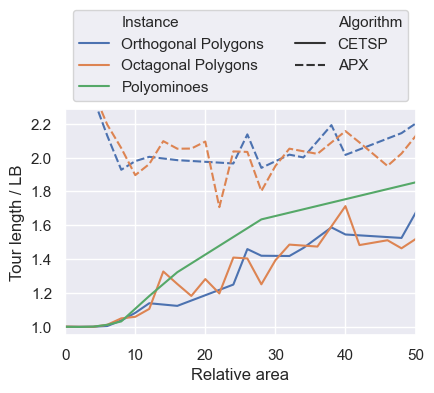

In [2]:
t = pd.read_json("./external/alenex_2023.json.zip")
t = t[t["Type"]!="fpg-poly"]
t["Type"].replace({"srpg-iso": "Orthogonal Polygons", "srpg-octa":"Octagonal Polygons" }, inplace=True)

# Set title
t["Instance"] = t["Type"]
# Set aligned instances as polyominoes
t.loc[t['instance'].str.contains('aligned'), 'Instance'] = 'Polyominoes'

fig = plt.figure(figsize=(4.5,4.5))
t["gapp"]=100*(t["gap"]-1)
t["relativeArea"]=t["relativeArea"].apply(lambda x: round(x/2)*2)
hue_order = ['Orthogonal Polygons', 'Octagonal Polygons', 'Polyominoes']
sns.lineplot(data=t, x="relativeArea", y="gap", hue="Instance", style="Algorithm", errorbar=None, hue_order=hue_order)
plt.xlim(0, 50)
plt.ylim(0.95, 2.29)
#plt.legend(title="Algorithm")
#plt.title("Lower is better")
#plt.ylabel("Tour length above lower bound (\%)")
plt.ylabel("Tour length / LB")
plt.xlabel("Relative area")
plt.tight_layout()
plt.subplots_adjust(top=0.65)
plt.legend(ncol=2,bbox_to_anchor=(0.5, 1.47), loc="upper center")
plt.savefig("out/09_alenex.pdf")
plt.show()